In [ ]:
"""
plot differet design of LArTPC's stats
@aurthor Jiancheng Zeng
@Oct 26 2021
"""

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from numpy import array
import pandas as pd
import math
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [61]:
"""
index_pbar, dEOut_pbar, dEIn_pbar, time_pbar, angle_pbar, distance_pbar, PeD_pbar, PeD_pbar_z
"""

anti_proton_Old = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/Old_TPC140_GRASP_anti_proton_5e7_MeV_vector.txt", delimiter = ' '))
anti_deuteron_Old = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/Old_TPC140_GRASP_anti_deuteron_5e7_MeV_vector.txt", delimiter = ' '))
anti_He3_Old = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/Old_TPC140_GRASP_anti_He3_5e7_MeV_vector.txt", delimiter = ' '))

anti_proton_New = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/New_TPC320_GRASP_anti_proton_5e7_MeV_vector.txt", delimiter = ' '))
#anti_deuteron_New = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/No_button_GRASP_anti_deuteron_1e8_MeV_Vector.txt", delimiter = ' '))
anti_He3_New = np.array(pd.read_table("/Users/jiancheng/GRAMS/data/TOF/New_TPC320_GRASP_anti_He3_5e7_MeV_vector.txt", delimiter = ' '))

print("Finish reading data!")

Finish reading data!


TPC 320cm Number of events more than 1.0m:122444(0.761216763131555)
TPC 140cm Number of events more than 1.0m:32026


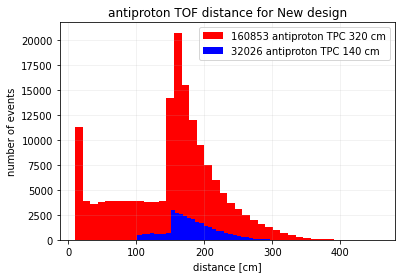

In [62]:
plt.hist(anti_proton_New[:,5], bins = 40, label = "%d antiproton TPC 320 cm"%len(anti_proton_New[:,5][anti_proton_New[:, 5]>0]), color = 'r')
plt.hist(anti_proton_Old[:,5], bins = 40, label = "%d antiproton TPC 140 cm"%len(anti_proton_Old[:,5]), color = 'b')
plt.title('antiproton TOF distance for New design')
plt.xlabel('distance [cm]')
plt.ylabel('number of events')
plt.legend(loc='best')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)
print("TPC 320cm Number of events more than 1.0m:"+str(len(anti_proton_New[:,5][anti_proton_New[:,5]>100]))+"("+str(len(anti_proton_New[:,5][anti_proton_New[:,5]>100])/len(anti_proton_New[:,5]))+")")
print("TPC 140cm Number of events more than 1.0m:"+str(len(anti_proton_Old[:,5][anti_proton_Old[:,5]>100])))

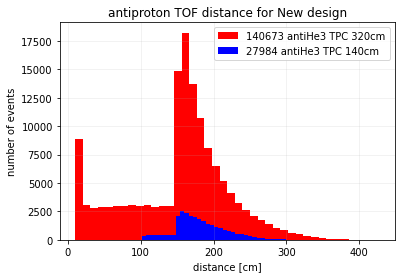

In [63]:
plt.hist(anti_He3_New[:,5], bins = 40, label = "%d antiHe3 TPC 320cm"%len(anti_He3_New[:,5][anti_He3_New[:,5]>0]), color = 'r')
plt.hist(anti_He3_Old[:,5], bins = 40, label = "%d antiHe3 TPC 140cm"%len(anti_He3_Old[:,5][anti_He3_Old[:,5]>0]), color = 'b')
plt.title('antiHe3 TOF distance for New design')
plt.xlabel('distance [cm]')
plt.ylabel('number of events')
plt.legend(loc='best')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)

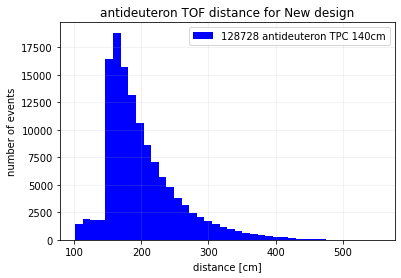

In [64]:
plt.hist(anti_deuteron_Old[:,5], bins = 40, label = "%d antideuteron TPC 140cm"%len(anti_deuteron_Old[:,5][anti_deuteron_Old[:,5]>0]), color = 'b')
plt.title('antideuteron TOF distance for New design')
plt.xlabel('distance [cm]')
plt.ylabel('number of events')
plt.legend(loc='best')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)